# Navigation Tab Bar

In [1]:
import os

import pandas as pd
import sys

src_path = os.path.abspath(os.path.join(os.getcwd(),'..','..'))
sys.path.append(src_path)

from src import query_engines, dataframe_pivot, dataframe_visualizer

q = query_engines.QueryEngines()

# Collection Opened Evolution

In [5]:
QUERY_NAME = "navigation_tab_bar.sql"  # With sql
START_DATE = "'2025-01-01'"
END_DATE = "'2025-02-15'"

params = [
    {"name": "start_date", "value": str(START_DATE)},
    {"name": "end_date", "value": str(END_DATE)},
]

q.prepare_query(QUERY_NAME, params=params, output_file=QUERY_NAME, load_previous=False)

df = q.query_run_starburst()
df.head()


/Users/jordicremades/Documents/repos/thoth/src/query_engines.py:134: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/ff64af8b5edf750adfca389f66b6492cf62009dff81d4bc2d15d79f6a050fe11


,creation_date,vertical,n_events,n_sessions
0,2025-01-16,Untagged,604,135
1,2025-01-20,Food,1160411,418737
2,2025-01-25,Not_found,7615,2321
3,2025-02-06,Groceries,1969617,210044
4,2025-02-01,Untagged,590,150


In [6]:
# Create an instance of DataFramePivot
dp = dataframe_pivot.DataFramePivot(df)

TIME = 'creation_date'
DIMENSIONS = ['vertical']
MEASURES = ['n_events', 'n_sessions']
AFFUNCS = ['sum']

# Call the pivot_and_aggregate method
p = dp.pivot_and_aggregate(
    t=TIME,
    dimensions=DIMENSIONS,
    measures=MEASURES,
    aggfuncs=AFFUNCS
)

p.head()

,creation_date,n_events_sum_Food,n_events_sum_Groceries,n_events_sum_Not_found,n_events_sum_Retail,n_events_sum_Untagged,n_sessions_sum_Food,n_sessions_sum_Groceries,n_sessions_sum_Not_found,n_sessions_sum_Retail,n_sessions_sum_Untagged
0,2025-01-01,1577346,1286380,4235,238336,69,554121,180141,1720,48430,50
1,2025-01-02,1287845,2008295,6223,403146,241,457543,213099,1822,68238,77
2,2025-01-03,1425762,2071485,6608,425787,616,513472,222840,1855,70576,168
3,2025-01-04,1463192,2310144,7071,455298,1412,521257,240512,2008,73125,327
4,2025-01-05,1571211,2225869,7020,401989,51,556202,246534,2093,67342,28


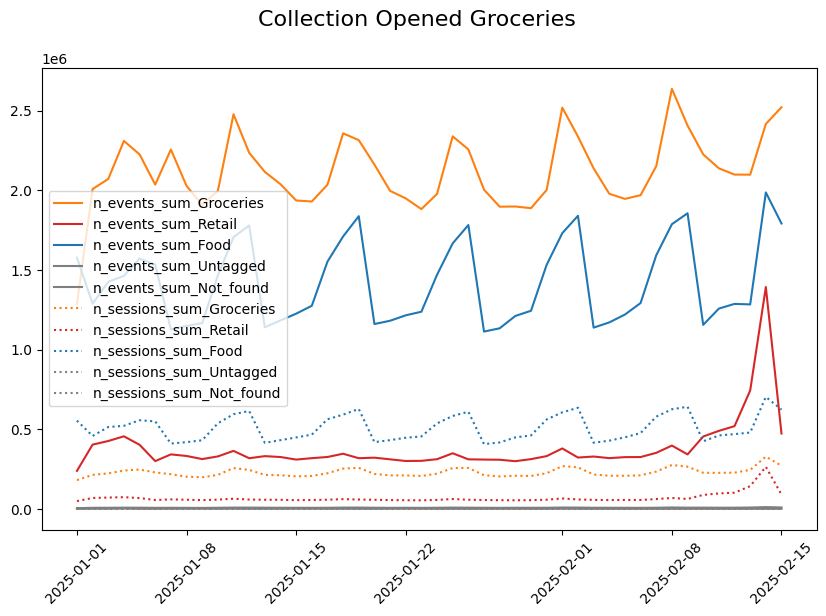

In [17]:
v = dataframe_visualizer.DataFrameVisualizer(p)

plot_params = [
    {
        "plot_type": "lineplot",
        "x_column": "creation_date",
        "y_columns": ["n_events_sum_Groceries", "n_events_sum_Retail", "n_events_sum_Food", "n_events_sum_Untagged", "n_events_sum_Not_found",
                      "n_sessions_sum_Groceries", "n_sessions_sum_Retail", "n_sessions_sum_Food", "n_sessions_sum_Untagged", "n_sessions_sum_Not_found"],
        "colors": ["orange","red","blue","gray","gray",
                   "orange","red","blue","gray","gray"],
        "styles": ["-", "-", "-", "-", "-", ":", ":", ":", ":", ":"],
        "legend": True,
    },
]

figure_params = {
    'n_plots': 1,
    'fig_length': 10,
    'fig_height': 6,
    'x_rotation': 45,
    'share_x': True,
    'share_y': False,
    'x_limits': None, # [(0,100),(0,1000)]
    'y_limits': None, # [(0,100),(0,1000)]
    'log_axis': None, # 'x', 'y', 'both'
    'title': 'Collection Opened Groceries'
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)


# Check on the Assumption that Collection Opened has similar volume to Navigation Impression

In [2]:
QUERY_NAME = "assumption_co_ni.sql"  # With sql
START_DATE = "'2025-01-01'"
END_DATE = "'2025-02-15'"

params = [
    {"name": "start_date", "value": str(START_DATE)},
    {"name": "end_date", "value": str(END_DATE)},
]

q.prepare_query(QUERY_NAME, params=params, output_file=QUERY_NAME, load_previous=True)

df = q.query_run_starburst()
df.head()

,p_creation_date,vertical,co_n_events,co_n_sessions,ni_n_events,ni_n_sessions
0,2025-01-30,Untagged,238,66,9843,3893
1,2025-02-10,Food,1183926,436916,3205770,1096765
2,2025-02-12,Untagged,15,15,9906,3838
3,2025-01-09,Untagged,777,185,9035,3624
4,2025-01-03,Food,1460622,529068,3924651,1330401


In [3]:
# Create an instance of DataFramePivot
dp = dataframe_pivot.DataFramePivot(df)

TIME = 'p_creation_date'
DIMENSIONS = ['vertical']
MEASURES = ['co_n_events', 'ni_n_events']
AFFUNCS = ['sum']

# Call the pivot_and_aggregate method
p = dp.pivot_and_aggregate(
    t=TIME,
    dimensions=DIMENSIONS,
    measures=MEASURES,
    aggfuncs=AFFUNCS
)
 
p.head()

,p_creation_date,co_n_events_sum_Food,co_n_events_sum_Groceries,co_n_events_sum_Retail,co_n_events_sum_Unknown,co_n_events_sum_Untagged,ni_n_events_sum_Food,ni_n_events_sum_Groceries,ni_n_events_sum_Retail,ni_n_events_sum_Unknown,ni_n_events_sum_Untagged
0,2025-01-01,1613592,1340983,246284,6827,74,4364867,568049,143677,12366,14617
1,2025-01-02,1318779,2095257,414524,8403,327,3548220,745860,217483,9847,11888
2,2025-01-03,1460622,2162386,437806,8905,906,3924651,773740,228039,10073,12751
3,2025-01-04,1499549,2407231,467382,9506,2137,4003257,853664,239299,11508,14821
4,2025-01-05,1610414,2319135,413291,9642,67,4274577,875781,220183,11169,14262


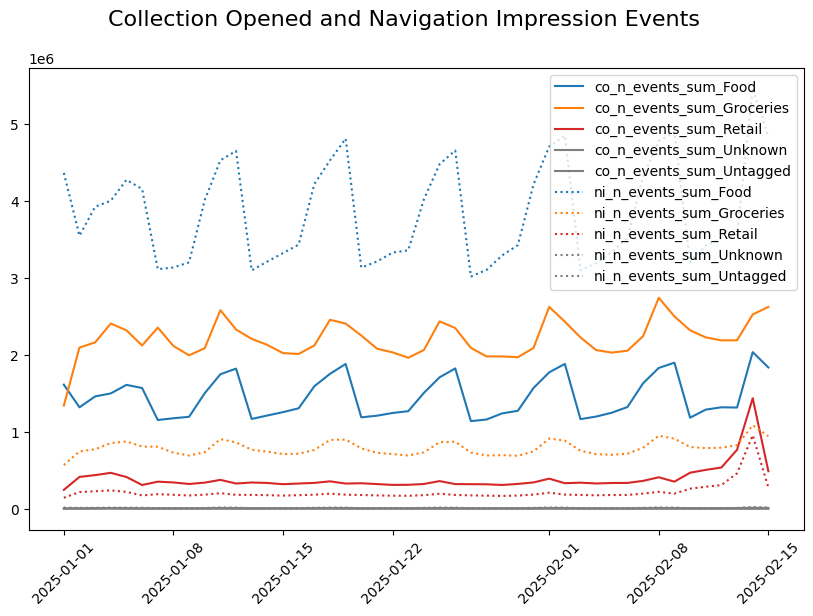

In [4]:
v = dataframe_visualizer.DataFrameVisualizer(p)

plot_params = [
    {
        "plot_type": "lineplot",
        "x_column": "p_creation_date",
        "y_columns": [
            "co_n_events_sum_Food", "co_n_events_sum_Groceries", "co_n_events_sum_Retail", "co_n_events_sum_Unknown", "co_n_events_sum_Untagged",
            "ni_n_events_sum_Food", "ni_n_events_sum_Groceries", "ni_n_events_sum_Retail", "ni_n_events_sum_Unknown", "ni_n_events_sum_Untagged"
        ],
        "colors": ["blue", "orange", "red", "gray", "gray", "blue", "orange", "red", "gray", "gray"],
        "styles": ["-", "-", "-", "-", "-", ":", ":", ":", ":", ":"],
        "legend": True,
    },
]

figure_params = {
    'n_plots': 1,
    'fig_length': 10,
    'fig_height': 6,
    'x_rotation': 45,
    'share_x': True,
    'share_y': False,
    'x_limits': None,
    'y_limits': None,
    'log_axis': None,
    'title': 'Collection Opened and Navigation Impression Events'
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)


Observing the plot, it is clear that we can't use the Collection Opened to compare with the Navigation Tab Bar Impression event. Food stores do not have as many Collection Opened, and we would undercount them. Also how come they have some many Store Mobile Navigation Bar Impression events? This seems like an error, as if you open the restaurant and scroll down to the bottom, you'll see that the event triggers. That should not be the case. This not occurr with Groceries partners. So for Groceries partners, I will be able to use this event.

# CTR for Collections and Suppercollections

In [10]:
QUERY_NAME = "ctr.sql"  # With sql
START_DATE = "'2025-01-01'"
END_DATE = "'2025-02-15'"

params = [
    {"name": "start_date", "value": str(START_DATE)},
    {"name": "end_date", "value": str(END_DATE)},
]

q.prepare_query(QUERY_NAME, params=params, output_file=QUERY_NAME, load_previous=False)

df = q.query_run_starburst()
df.head()

Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/ea53d39d85f4c8287f4d67428c8730964e853b585dab4d32cad925dfcc21825a


,creation_date,bar_impressions_sessions_store,bar_collection_taps_sessions_store,bar_supercollection_taps_sessions_store,bar_other_taps_sessions_store,bar_total_taps_sessions_store
0,2025-01-31,351777,147541,31140,0,152886
1,2025-01-15,319289,141516,30049,0,146426
2,2025-01-25,406099,167297,35406,0,173387
3,2025-01-04,387687,164218,34548,0,169722
4,2025-01-11,405162,174441,37048,0,180224


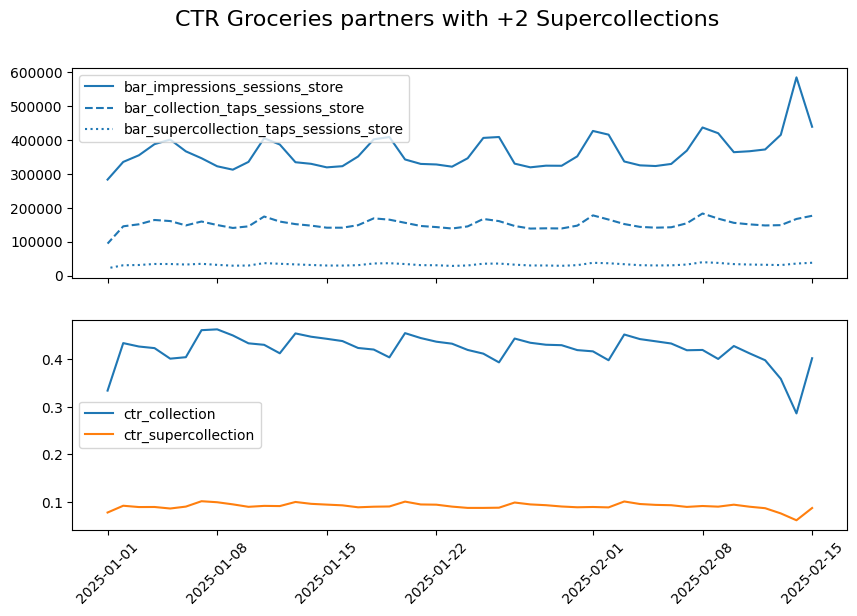

In [21]:
df.sort_values(by='creation_date', ascending=False, inplace=True)
df['ctr_collection'] = df['bar_collection_taps_sessions_store'] / df['bar_impressions_sessions_store']
df['ctr_supercollection'] = df['bar_supercollection_taps_sessions_store'] / df['bar_impressions_sessions_store']

v = dataframe_visualizer.DataFrameVisualizer(df)

plot_params = [
    {
        "plot_type": "lineplot",
        "x_column": "creation_date",
        "y_columns": ["bar_impressions_sessions_store", "bar_collection_taps_sessions_store", "bar_supercollection_taps_sessions_store"],
        "colors": ['blue','blue','blue'],
        "styles": ['-', '--', ':'],
        "legend": True,
    },
    {
        "plot_type": "lineplot",
        "x_column": "creation_date",
        "y_columns": ["ctr_collection", "ctr_supercollection"],
        "legend": True,
    },
]

figure_params = {
    'n_plots': 2,
    'fig_length': 10,
    'fig_height': 6,
    'x_rotation': 45,
    'share_x': True,
    'share_y': False,
    'x_limits': None, # [(0,100),(0,1000)]
    'y_limits': None, # [(0,100),(0,1000)]
    'log_axis': None, # 'x', 'y', 'both'
    'title': 'CTR Groceries partners with +2 Supercollections'
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)


Why during SV do we have a lower CVR?

In [25]:
print('Data for Groceries with 2+ Supercollections')
print('CTR Collection')
print(df['bar_collection_taps_sessions_store'].sum() / df['bar_impressions_sessions_store'].sum())
print('CTR SuperCollection')
print(df['bar_supercollection_taps_sessions_store'].sum() / df['bar_impressions_sessions_store'].sum())

Data for Groceries with 2+ Supercollections
CTR Collection
0.41815179328517127
CTR SuperCollection
0.09004896950211197


# Clicks per Session

In [27]:
QUERY_NAME = "clicks_session.sql"  # With sql
START_DATE = "'2025-01-01'"
END_DATE = "'2025-02-15'"

params = [
    {"name": "start_date", "value": str(START_DATE)},
    {"name": "end_date", "value": str(END_DATE)},
]

q.prepare_query(QUERY_NAME, params=params, output_file=QUERY_NAME, load_previous=False)

df = q.query_run_starburst()
df.head()

Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/2f6ef7f1ec7e2dff08ce7fff4959327497277ccd69a689c605e754a5d53d546c


,creation_date,n_sessions,bar_collection_taps_events,bar_supercollection_taps_events,bar_any_taps_events
0,2025-02-15,2703909,1218682,201287,1419969
1,2025-01-04,2364089,1132464,184095,1316559
2,2025-01-05,2482274,1055749,177925,1233674
3,2025-02-06,2124432,965926,160551,1126477
4,2025-02-02,2597563,1107295,190002,1297297


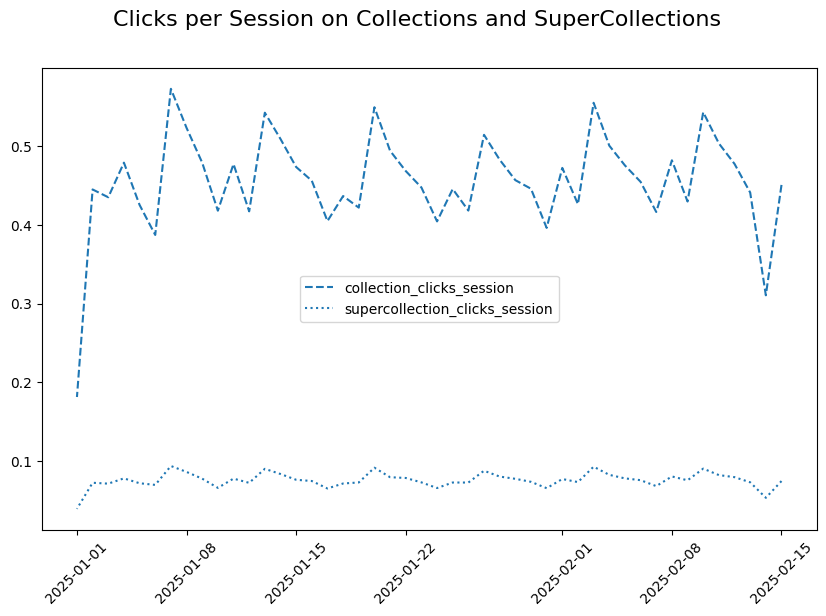

In [31]:
df.sort_values(by='creation_date', ascending=False, inplace=True)
df['collection_clicks_session'] = df['bar_collection_taps_events'] / df['n_sessions']
df['supercollection_clicks_session'] = df['bar_supercollection_taps_events'] / df['n_sessions']

v = dataframe_visualizer.DataFrameVisualizer(df)

plot_params = [
    {
        "plot_type": "lineplot",
        "x_column": "creation_date",
        "y_columns": ["collection_clicks_session", "supercollection_clicks_session"],
        "colors": ['blue','blue'],
        "styles": ['--', ':'],
        "legend": True,
    },
]

figure_params = {
    'n_plots': 1,
    'fig_length': 10,
    'fig_height': 6,
    'x_rotation': 45,
    'share_x': True,
    'share_y': False,
    'x_limits': None, # [(0,100),(0,1000)]
    'y_limits': None, # [(0,100),(0,1000)]
    'log_axis': None, # 'x', 'y', 'both'
    'title': 'Clicks per Session on Collections and SuperCollections'
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)


In [30]:
print('Data for Groceries with 2+ Supercollections')
print('Collection Clicks per Session')
print(df['bar_collection_taps_events'].sum() / df['n_sessions'].sum())
print('SuperCollection Clicks per Session')
print(df['bar_supercollection_taps_events'].sum() / df['n_sessions'].sum())

Data for Groceries with 2+ Supercollections
Collection Clicks per Session
0.44907481302260355
SuperCollection Clicks per Session
0.07470262654143872


# SuperCollection Opened Mosaic vs Navigation Tab Bar

In [47]:
QUERY_NAME = "co_distribution.sql"  # With sql
START_DATE = "'2025-01-01'"
END_DATE = "'2025-02-15'"

params = [
    {"name": "start_date", "value": str(START_DATE)},
    {"name": "end_date", "value": str(END_DATE)},
]

q.prepare_query(QUERY_NAME, params=params, output_file=QUERY_NAME, load_previous=True)

df = q.query_run_starburst()
df.head()

,creation_date,n_events_mosaic,n_events_navigation
0,2025-01-01,393621,112348
1,2025-01-02,636104,159459
2,2025-01-03,649562,165480
3,2025-01-04,721112,184095
4,2025-01-05,688380,177925


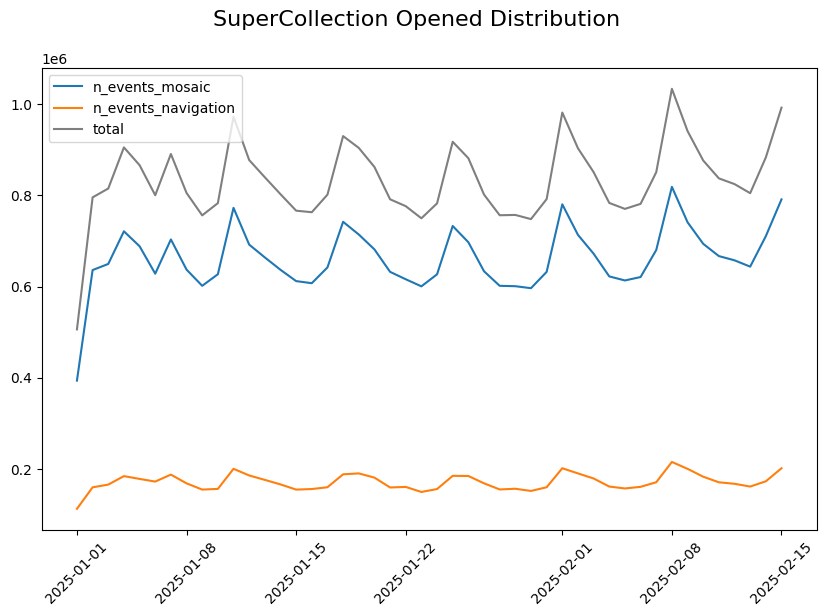

In [49]:
df['creation_date'] = pd.to_datetime(df['creation_date'])
df.sort_values(by='creation_date', ascending=False, inplace=True)
df['total'] = df['n_events_mosaic'] + df['n_events_navigation']

v = dataframe_visualizer.DataFrameVisualizer(df)

plot_params = [
    {
        "plot_type": "lineplot",
        "x_column": "creation_date",
        "y_columns": ["n_events_mosaic", "n_events_navigation", "total"],
        "colors": ['blue','orange','gray'],
        "styles": ['-', '-', '-'],
        "legend": True,
    },
]

figure_params = {
    'n_plots': 1,
    'fig_length': 10,
    'fig_height': 6,
    'x_rotation': 45,
    'share_x': True,
    'share_y': False,
    'x_limits': None, # [(0,100),(0,1000)]
    'y_limits': None, # [(0,100),(0,1000)]
    'log_axis': None, # 'x', 'y', 'both'
    'title': 'SuperCollection Opened Distribution'
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)


In [51]:
print('SuperCollection Opened Distribution')
print('% Mosaic')
print(df['n_events_mosaic'].sum() / df['total'].sum())
print('% Navigation')
print(df['n_events_navigation'].sum() / df['total'].sum())

SuperCollection Opened Distribution
% Mosaic
0.7946266598557039
% Navigation
0.20537334014429612


# BottomReached

In [52]:
QUERY_NAME = "bottom_reached.sql"  # With sql
START_DATE = "'2025-01-01'"
END_DATE = "'2025-02-15'"

params = [
    {"name": "start_date", "value": str(START_DATE)},
    {"name": "end_date", "value": str(END_DATE)},
]

q.prepare_query(QUERY_NAME, params=params, output_file=QUERY_NAME, load_previous=True)

df = q.query_run_starburst()
df.head()

,creation_date,n_collection_opened,n_bottom_reached
0,2025-01-18,2146664,1106854
1,2025-01-03,1885958,987956
2,2025-01-06,1812971,961839
3,2025-01-01,1065815,558216
4,2025-01-27,1841543,936050


In [56]:
print('Bottom Reached')
print('# Collection Opened: ', df['n_collection_opened'].sum())
print('# Bottom Reached: ', df['n_bottom_reached'].sum())
print('% Bottom Reached: ', df['n_bottom_reached'].sum() / df['n_collection_opened'].sum())

Bottom Reached
# Collection Opened:  88188471
# Bottom Reached:  45370475
% Bottom Reached:  0.5144717272623992
